In [26]:
import pandas as pd
import numpy as np


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df=pd.read_csv('Classified Data',index_col=0)

In [29]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# WHY KNN?
So you notice we have a bunch of data but we just have a target class.Column 1 or 0.And essentially just random letters for the column names.
And this is essentially just anonymised classified data.

So you don't know any of these numbers represent.

Or you also don't know what these column names represent.

You just know that you need to use these features that are unknown to you as far as what they actually

represent in order to predict a target class 1 or 0 because the K and classifier predicts the class

of a given test observation by identifying the observations that are nearest to it.
So you don't know any of these numbers represent.

Or you also don't know what these column names represent.

You just know that you need to use these features that are unknown to you as far as what they actually

represent in order to predict a target class 1 or 0.

* because the K and classifier predicts the class of a given test observation by identifying the observations that are nearest to it.*

#The scale of the variable actually matters a lot and any variables that are on a large scale will have a much larger effect on the distance between observations and because of this when you're using Kinnear's neighbors to say fire which going to want to do is try to standardize everything to the same scale.


**Luckily sikat learned (sklearn) actually has a lot of built in tools to help you through this process.**


In [30]:
from sklearn.preprocessing import StandardScaler


In [31]:
scaler =StandardScaler()

In [32]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [33]:
scaled_features =scaler.transform(df.drop('TARGET CLASS',axis=1))

In [41]:
df_feat = pd.DataFrame(scaled_features ,columns=df.columns[:-1])

In [37]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [38]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [42]:
df_feat.head()                    #And now we have a standard scale or standardized version of our data.
                                  #And now our data is ready to be put into a machine learning algorithms
                                  #such as KNN which really depends on the distance between each feature.

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [43]:
from sklearn.cross_validation import train_test_split           #it did not work, below code works

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
X =df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn =KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [68]:
pred = knn.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(confusion_matrix(y_test,pred))


print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [71]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i =knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [72]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [77]:
#error_rate

Text(0, 0.5, 'Error rate')

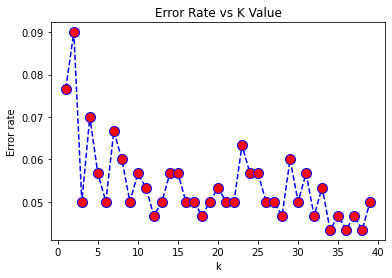

In [74]:
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title('Error Rate vs K Value')
plt.xlabel('k')
plt.ylabel('Error rate')

In [76]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred =knn.predict(X_test)

print(confusion_matrix(y_test,pred))

print('\n')
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



# Let's consider a small example to demonstrate the process of standardization using the z-score. 

**Suppose we have a dataset with two features: "Height" (in inches) and "Weight" (in pounds). Here's the original data:

In [ ]:
Height  Weight
68      150
72      180
66      160
70      175


**To standardize the data, we follow these steps:

**1.Calculate the mean (μ) and standard deviation (σ) for each feature.

**Height: mean = (68 + 72 + 66 + 70) / 4 = 69
        std deviation = sqrt(((68-69)^2 + (72-69)^2 + (66-69)^2 + (70-69)^2) / 4) ≈ 2.16

**Weight: mean = (150 + 180 + 160 + 175) / 4 = 166.25
        std deviation = sqrt(((150-166.25)^2 + (180-166.25)^2 + (160-166.25)^2 + (175-166.25)^2) / 4) ≈ 11.88


**2.For each value in a feature, subtract the mean of that feature from the value.

Height: (68 - 69) = -1
        (72 - 69) = 3
        (66 - 69) = -3
        (70 - 69) = 1

Weight: (150 - 166.25) ≈ -16.25
        (180 - 166.25) ≈ 13.75
        (160 - 166.25) ≈ -6.25
        (175 - 166.25) ≈ 8.75


**3.Divide the result by the standard deviation of that feature.

**After standardizing the data using the z-score, the transformed values are as follows:

In [ ]:
Height   Weight
-0.46    -1.37
1.39     1.16
-1.39    -0.53
0.46     0.74


**In the standardized data, each feature has a mean of zero and a standard deviation of one. This allows for a fair comparison between the features and ensures that they contribute equally in subsequent analyses or modeling tasks.